# Comparison of SPSA-CPT-G and CPT-PG for high-dimensional policy parametrizations


In [1]:
from utils import *
from training import *
from policies import *
from envs import *

## The Environment
![The map](figures/fivefive.png)



## Training with both algorithms for different sizes

In [3]:
n_tries = 10

LLsample_ours_dict = {}
LLsample_theirs_dict = {}
LLcpt_ours_dict = {}
LLcpt_theirs_dict = {}
for param_size in [3,5,9]:
    print(f"Size of the grid :{param_size}")
    LLsample_theirs = []
    LLcpt_theirs = []
    for i in range(n_tries):
        X,Lsample,Lcpt,Lu = train_spsa(tabular_policy,DiagonalTown(size=param_size),batch_size=100,eta = 0.2,max_steps=10*param_size,alpha= 0.2, w=wp_new, num_episodes = 200,size=param_size,plot=False)
        LLsample_theirs.append(Lsample)
        LLcpt_theirs.append(Lcpt)
    
    LLsample_ours = []
    LLcpt_ours = []
    for i in range(n_tries):
        policy = MLP_tabular(n=param_size)
        L,Lu,Lx,Lcpt,Lsample = train(policy,optim.Adam(policy.parameters(), lr=0.2),action_direct=True,continuous=False,max_steps=10*param_size,reinforce=False,entropy_reg=None,s=0.1,return_best=True,env=DiagonalTown(size=param_size,format=False),draw_policy=False,batch_size=100,num_episodes=200,w = wp_new)
        LLsample_ours.append(Lsample)
        LLcpt_ours.append(Lcpt)

    
    LLsample_theirs_dict[param_size] = LLsample_theirs
    LLsample_ours_dict[param_size] = LLsample_ours
    LLcpt_theirs_dict[param_size] = LLcpt_theirs
    LLcpt_ours_dict[param_size] = LLcpt_ours


Size of the grid :3
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Size of the grid :5
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Size of the grid :9
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state
Loading best state


## Plotting the results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


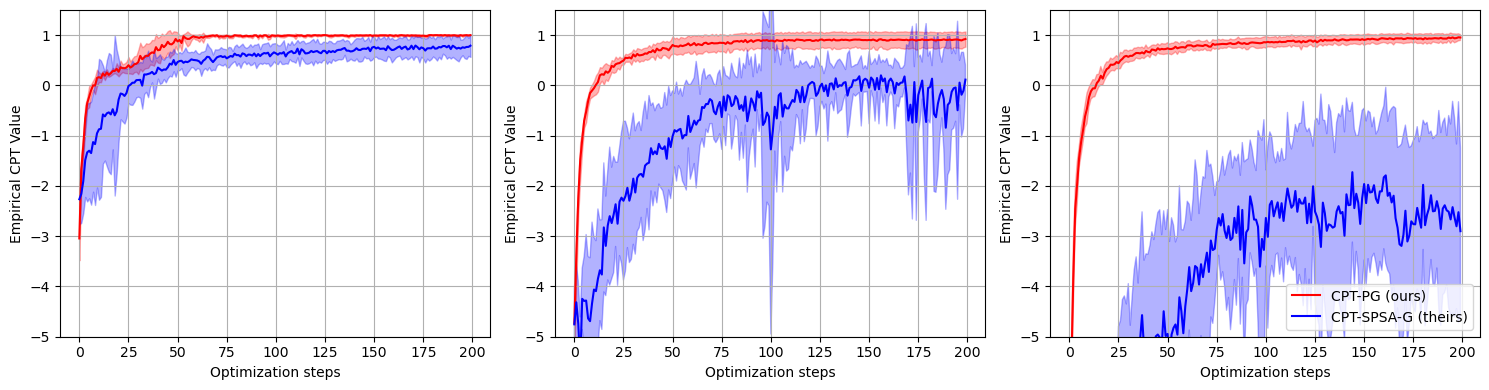

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 10, 100)

# Create a 1x5 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))  # Adjust figsize for better spacing

# Loop over the axes and create a plot in each
for i, ax in zip([3,5,9],axes):
    LLcpt_ours, LLcpt_theirs = LLcpt_ours_dict[i], LLcpt_theirs_dict[i]
    runs =LLcpt_ours  # Replace this with your actual data
    
    # Calculate mean and standard deviation
    mean_performance = np.mean(runs, axis=0)
    std_performance = np.std(runs, axis=0)
    
    # Plotting
    steps = np.arange(len(runs[0]) )# Assuming 100 steps

    # Plot the mean performance
    ax.plot(steps, mean_performance, label='CPT-PG (ours)', color='red')
    
    # Shaded area for standard deviation
    ax.fill_between(steps, mean_performance - std_performance, 
                     mean_performance + std_performance, color='red', alpha=0.3)
    
    runs =LLcpt_theirs  # Replace this with your actual data
    
    # Calculate mean and standard deviation
    mean_performance = np.mean(runs, axis=0)
    std_performance = np.std(runs, axis=0)
    
    # Plotting
    steps = np.arange(len(runs[0]) )# Assuming 100 steps
    
    
    # Plot the mean performance
    ax.plot(steps, mean_performance, label='CPT-SPSA-G (theirs)', color='blue')
    
    # Shaded area for standard deviation
    ax.fill_between(steps, mean_performance - std_performance, 
                     mean_performance + std_performance, color='blue', alpha=0.3)
    
    
    # Labels and title
    ax.set_ylim(-5,1.5)
    ax.grid(True)
    ax.set_xlabel('Optimization steps')
    ax.set_ylabel('Empirical CPT Value')
    
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
